In [101]:
import pandas as pd
import numpy as np
from os import path
from CSVUtils import *
import ta
import matplotlib.pyplot as plt
import seaborn as sn

In [155]:
DIR = "./input/yahoo/buffer"
nameList = ["^GSPC", "^GDAXI", "^HSI"]
startDate = pd.to_datetime("2000-01-01")
endDate = pd.to_datetime("2019-12-31")

# for name in nameList:
df = csv2df(csv_path=DIR, csv_name=nameList[0]+".csv", source="yahoo")

In [156]:
df['Future_Price_7d'] = df.Price.shift(-7)
df['Future_Price_30d'] = df.Price.shift(-30)
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(inplace=True)

df['Change_7d'] = (df['Future_Price_7d'] - df['Price'])/df['Price']
df['Change_30d'] = (df['Future_Price_30d'] - df['Price'])/df['Price']
df.fillna(0, inplace=True)

bins = [-np.inf, -0.1, -0.01, 0.01, 0.1, np.inf]
labels=['Strong Bear','Weak Bear','Horizontal','Weak Bull', 'Strong Bull']
df['Cat_7d'] = pd.cut(df['Change_7d'], bins=bins, labels=labels)
df['Cat_30d'] = pd.cut(df['Change_30d'], bins=bins, labels=labels)

In [157]:
df

,Date,Open,High,Low,Price,Vol,Change,Future_Price_7d,Future_Price_30d,Change_7d,Change_30d,Cat_7d,Cat_30d
1,1989-11-02,341.200012,341.200012,336.609985,338.480011,152440000,-0.007972,339.549988,350.140015,0.003161,0.034448,Horizontal,Weak Bull
2,1989-11-03,338.480011,339.670013,337.369995,337.619995,131500000,-0.002541,337.989990,343.690002,0.001096,0.017979,Horizontal,Weak Bull
3,1989-11-06,337.609985,337.619995,332.329987,332.609985,135480000,-0.014839,340.540009,342.459991,0.023842,0.029614,Weak Bull,Weak Bull
4,1989-11-07,332.609985,334.820007,330.910004,334.809998,163000000,0.006614,340.579987,342.839996,0.017234,0.023984,Weak Bull,Weak Bull
5,1989-11-08,334.809998,339.410004,334.809998,338.149994,170150000,0.009976,341.609985,344.779999,0.010232,0.019607,Weak Bull,Weak Bull
6,1989-11-09,338.149994,338.730011,336.209991,336.570007,143390000,-0.004672,339.350006,347.420013,0.008260,0.032237,Horizontal,Weak Bull
7,1989-11-10,336.570007,339.100006,336.570007,339.100006,131800000,0.007517,339.589996,346.809998,0.001445,0.022737,Horizontal,Weak Bull
8,1989-11-13,339.079987,340.510010,337.929993,339.549988,140750000,0.001327,341.910004,348.809998,0.006950,0.027271,Horizontal,Weak Bull
9,1989-11-14,339.549988,340.410004,337.059998,337.989990,143170000,-0.004594,343.970001,350.670013,0.017693,0.037516,Weak Bull,Weak Bull
10,1989-11-15,338.000000,340.540009,337.140015,340.540009,155130000,0.007545,345.609985,353.399994,0.014888,0.037764,Weak Bull,Weak Bull


In [90]:
df = ta.add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Price", volume="Vol")

# cols = list(df.columns)
# cols.remove('Cat_7d')
# cols.remove('Cat_30d')
# df[cols].fillna(0, inplace=True)

df = df[(df['Date'] >= startDate) & (df['Date'] <= endDate)]
df.reset_index(drop=True, inplace=True)

In [153]:
df

,Date,Open,High,Low,Price,Vol,Change,volume_adi,volume_obv,volume_cmf,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,-0.009549,1.416543e+11,79789900000,-0.074827,...,55.457064,72.151570,85.307577,-27.848430,38.814237,1455.950762,2.963923,-0.954911,-0.959499,326.500563
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,-0.038345,1.407148e+11,78780900000,-0.108487,...,38.339447,3.936542,57.027214,-96.063458,31.624555,1454.582649,-1.364552,-3.834467,-3.909918,310.146540
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.001922,1.411195e+11,79866400000,-0.025094,...,41.852489,24.352018,33.480043,-75.647982,18.556560,1451.692318,-1.331432,0.192218,0.192034,310.934917
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.000956,1.412795e+11,80958700000,0.037119,...,42.698222,25.687710,17.992090,-74.312290,5.829652,1448.813266,-1.032376,0.095568,0.095522,311.327638
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.027090,1.425047e+11,82183900000,0.090031,...,51.477296,63.586475,37.875401,-36.413525,-3.102233,1448.657577,0.560887,2.709040,2.672995,322.470668
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,0.011190,1.429406e+11,83248700000,0.090272,...,54.406064,79.665037,56.313074,-20.334963,-5.086853,1448.697318,1.494988,1.118997,1.112782,327.198102
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,-0.013063,1.422729e+11,82234700000,0.059254,...,49.832762,60.685843,67.979118,-39.314157,-1.862672,1448.507013,-1.356330,-1.306251,-1.314858,321.617822
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000,-0.004386,1.419476e+11,81260100000,0.087390,...,49.245905,54.395908,64.915596,-45.604092,5.369579,1447.964957,-1.705441,-0.438637,-0.439602,319.768449
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,0.012170,1.425537e+11,82290500000,0.085707,...,59.341990,71.770374,62.284042,-28.229626,12.620898,1447.987734,-0.547451,1.216970,1.209625,324.876906
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,0.010671,1.429085e+11,83376400000,0.080821,...,59.519793,87.191006,71.119096,-12.808994,19.473320,1448.091537,0.115484,1.067130,1.061476,329.410895


In [88]:
df.to_csv(path.join(DIR, nameList[0]+"_ta.csv"))

In [151]:
def plot_corr(df,size=20):
    import scipy
    import scipy.cluster.hierarchy as sch
    
    cluster_th = 4

    X = df.corr().values
    X[np.isnan(X)] = 0
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis=1)

    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    i = 0
    j = 0
    columns = []
    for cluster_l1 in set(sorted(ind)):
        j += counts[cluster_l1]
        sub = df[df.columns.values[i:j]]
        if counts[cluster_l1]>cluster_th:        
            X = sub.corr().values
            X[np.isnan(X)] = 0
            d = sch.distance.pdist(X)
            L = sch.linkage(d, method='complete')
            ind = sch.fcluster(L, 0.5*d.max(), 'distance')
            col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
            sub = sub.reindex(col, axis=1)
        cols = sub.columns.tolist()
        columns.extend(cols)
        i = j
    df = df.reindex(columns, axis=1)
    
    
    
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    plt.rcParams['figure.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

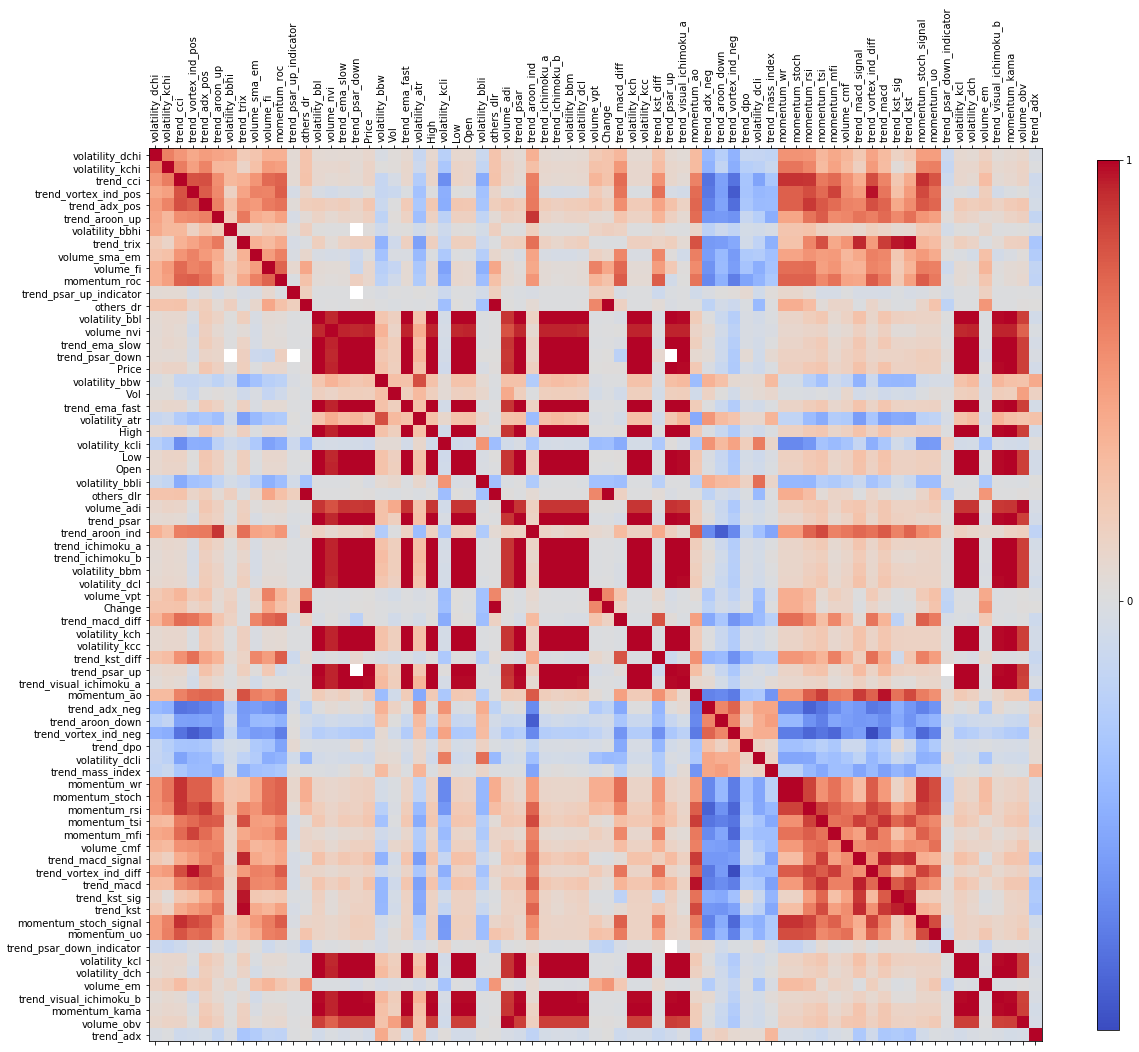

In [152]:
plot_corr(df)

In [133]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
X[np.isnan(X)] = 0
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

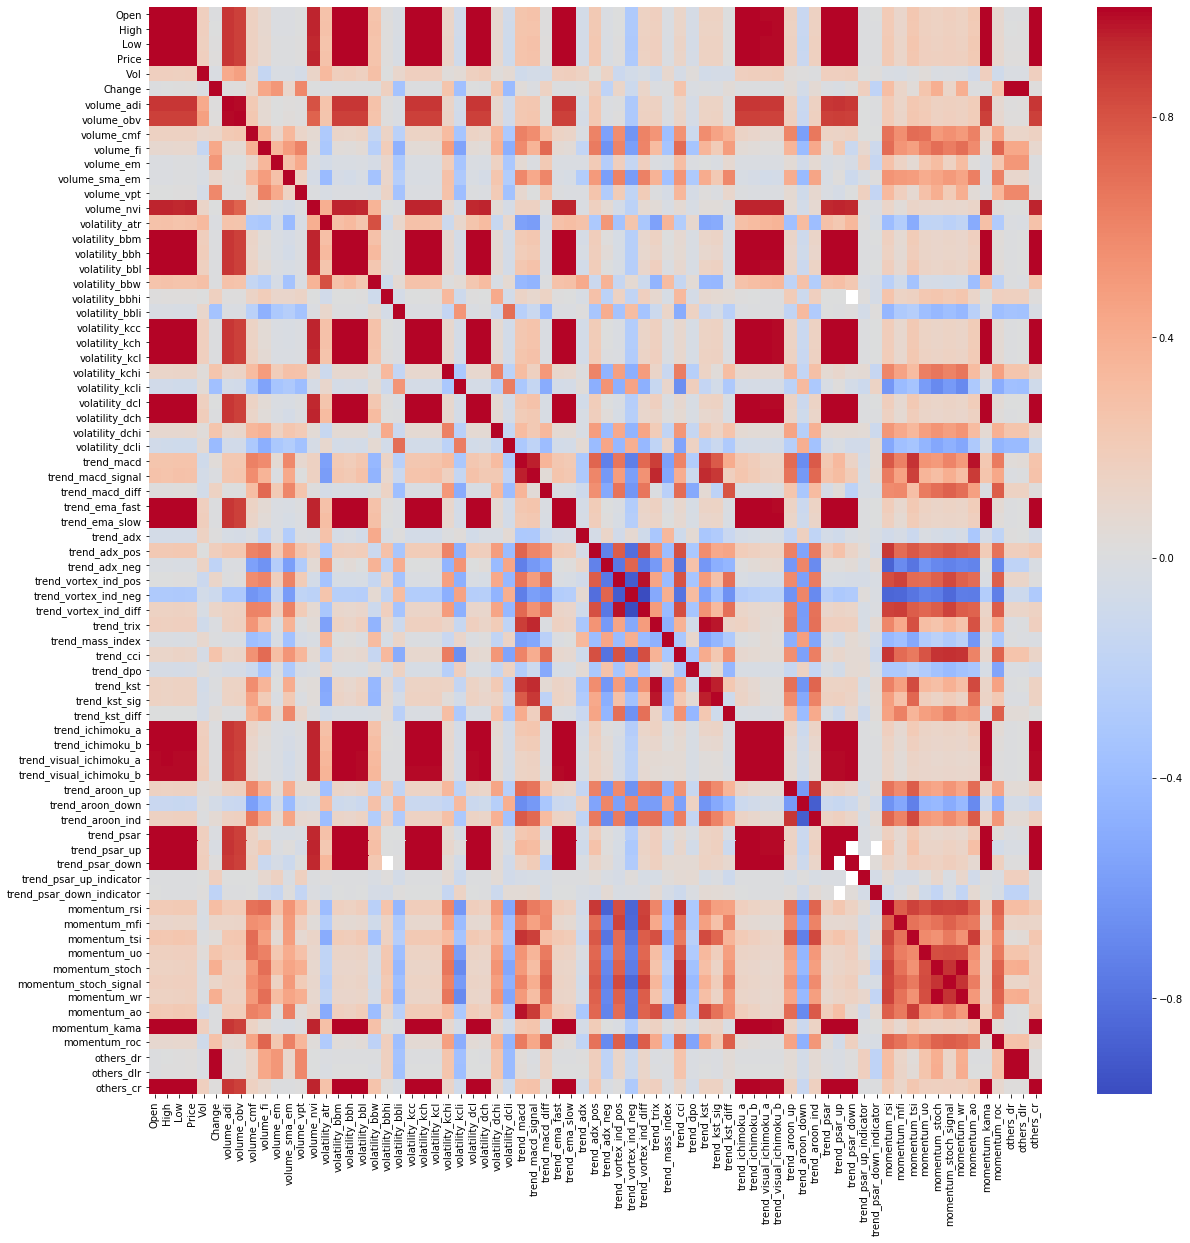

In [150]:
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(), cmap = 'coolwarm')